In [1]:
#import the libraries
import pandas as pd
import numpy as np

In [2]:
#Import companies csv
#encoding provided due to utf-8 encoding error
companies=pd.read_csv("companies.csv",encoding="ISO-8859–1")
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
#importing rounds2 csv
rounds2=pd.read_csv("rounds2.csv",encoding="ISO-8859–1")
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
#convert to lower to comapare and merge
rounds2.company_permalink=rounds2.company_permalink.str.lower()
companies.permalink=companies.permalink.str.lower()

In [5]:
#info of columns for rounds2
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [6]:
#info of columns for company
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [7]:
#Checking if funding_round_permalink is unique
rounds2.funding_round_permalink.is_unique

True

In [8]:
#Checking if company_permalink is unique
rounds2.company_permalink.is_unique

False

In [9]:
#Ensuring that permalink is unique attribute in companies
companies.permalink.is_unique

True

In [10]:
#finding the unique companies in round2
rounds2.company_permalink.nunique(dropna=True)

66370

In [11]:
#Ensuring if 66368(RangeIndex: 66368 entries
# 0   permalink      66368 non-null  object) is correct and unique number of fields in company using permalink column
companies.permalink.nunique(dropna=True)

66368

In [12]:
#merging data
master_frame=pd.merge(companies,rounds2,how='inner', left_on='permalink', right_on='company_permalink')
master_frame.shape

(114942, 16)

In [13]:
#drop the duplicate merged column
master_frame=master_frame.drop(['company_permalink'],axis=1)
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [14]:
#master_frame.isnull().sum()
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [15]:
#replacing null to median value 
median=master_frame['raised_amount_usd'].median()
master_frame['raised_amount_usd']=master_frame['raised_amount_usd'].fillna(median)

In [16]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd           0.00
dtype: float64

In [17]:
#filter investment type for required
master_frame=master_frame[master_frame['funding_round_type'].isin(['seed','angel','venture','private_equity'])]

In [18]:
master_frame['raised_amount_usd'].describe()

count    9.439000e+04
mean     8.230001e+06
std      6.995080e+07
min      0.000000e+00
25%      5.300000e+05
50%      1.680521e+06
75%      6.000000e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

In [19]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,1680521.0
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [20]:
df_analysis=master_frame.groupby('funding_round_type')
df_analysis['raised_amount_usd'].mean().sort_values(ascending = False)

funding_round_type
private_equity    6.236846e+07
venture           1.079369e+07
angel             1.104860e+06
seed              9.375032e+05
Name: raised_amount_usd, dtype: float64

In [21]:
df_analysis.describe()

raised_amount_usd                                   \
                               count          mean           std  min   
funding_round_type                                                      
angel                         6094.0  1.104860e+06  6.618585e+06  0.0   
private_equity                2285.0  6.236846e+07  1.841626e+08  0.0   
seed                         30518.0  9.375032e+05  1.994831e+06  0.0   
venture                      55493.0  1.079369e+07  8.220648e+07  0.0   

                                                                     
                          25%         50%         75%           max  
funding_round_type                                                   
angel                200000.0    600000.0   1680521.0  4.945120e+08  
private_equity      1680521.0  12122011.0  62400000.0  4.745460e+09  
seed                 100000.0    574586.5   1680521.0  2.000000e+08  
venture             1680521.0   4000000.0  10500000.0  1.760000e+10

#Mean and Median both are not giving the clear picture. If i went mean then Venture is clear answer but if i went with median private_equity make sense. So Looking at IQRs(.25-.75), i'll recommend the venture type funding.

In [22]:
#creating data frame for all eq type
mf_venture=master_frame[(master_frame.funding_round_type=='venture')]
mf_venture.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,1680521.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,1680521.0


In [23]:
#df for rest of the investment type
mf_angel=master_frame[(master_frame.funding_round_type=='angel')]
mf_seed=master_frame[(master_frame.funding_round_type=='seed')]
mf_private=master_frame[(master_frame.funding_round_type=='private_equity')]

In [24]:
#user check : Please ignore
#mf_angel.describe()
#mf_seed.describe()
mf_venture.describe()
#mf_private.describe()

,raised_amount_usd
count,5.549300e+04
mean,1.079369e+07
std,8.220648e+07
min,0.000000e+00
25%,1.680521e+06
50%,4.000000e+06
75%,1.050000e+07
max,1.760000e+10


In [25]:
median_venture=mf_venture['raised_amount_usd'].median()
median_angel=mf_angel['raised_amount_usd'].median()
median_seed=mf_seed['raised_amount_usd'].median()
median_private=mf_private['raised_amount_usd'].median()
print(median_venture)
print(median_angel)
print(median_seed)
print(median_private)

4000000.0
600000.0
574586.5
12122011.0


In [26]:
mf_venture_country=mf_venture.groupby('country_code')
venture_sort=mf_venture_country['raised_amount_usd'].sum().sort_values(ascending=False)
venture_sort.head(9)


country_code
USA    4.262634e+11
CHN    4.071433e+10
GBR    2.066240e+10
IND    1.467419e+10
CAN    9.734579e+09
FRA    7.373812e+09
ISR    7.099094e+09
DEU    6.730119e+09
JPN    3.437620e+09
Name: raised_amount_usd, dtype: float64

In [27]:
countries=['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN']
top9=mf_venture[mf_venture['country_code'].isin(countries)]

In [28]:
top9

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,1680521.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,1680521.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114915,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0
114916,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,555016.0
114927,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0
114929,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.0


In [29]:
#importing libraries for data analysis
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns



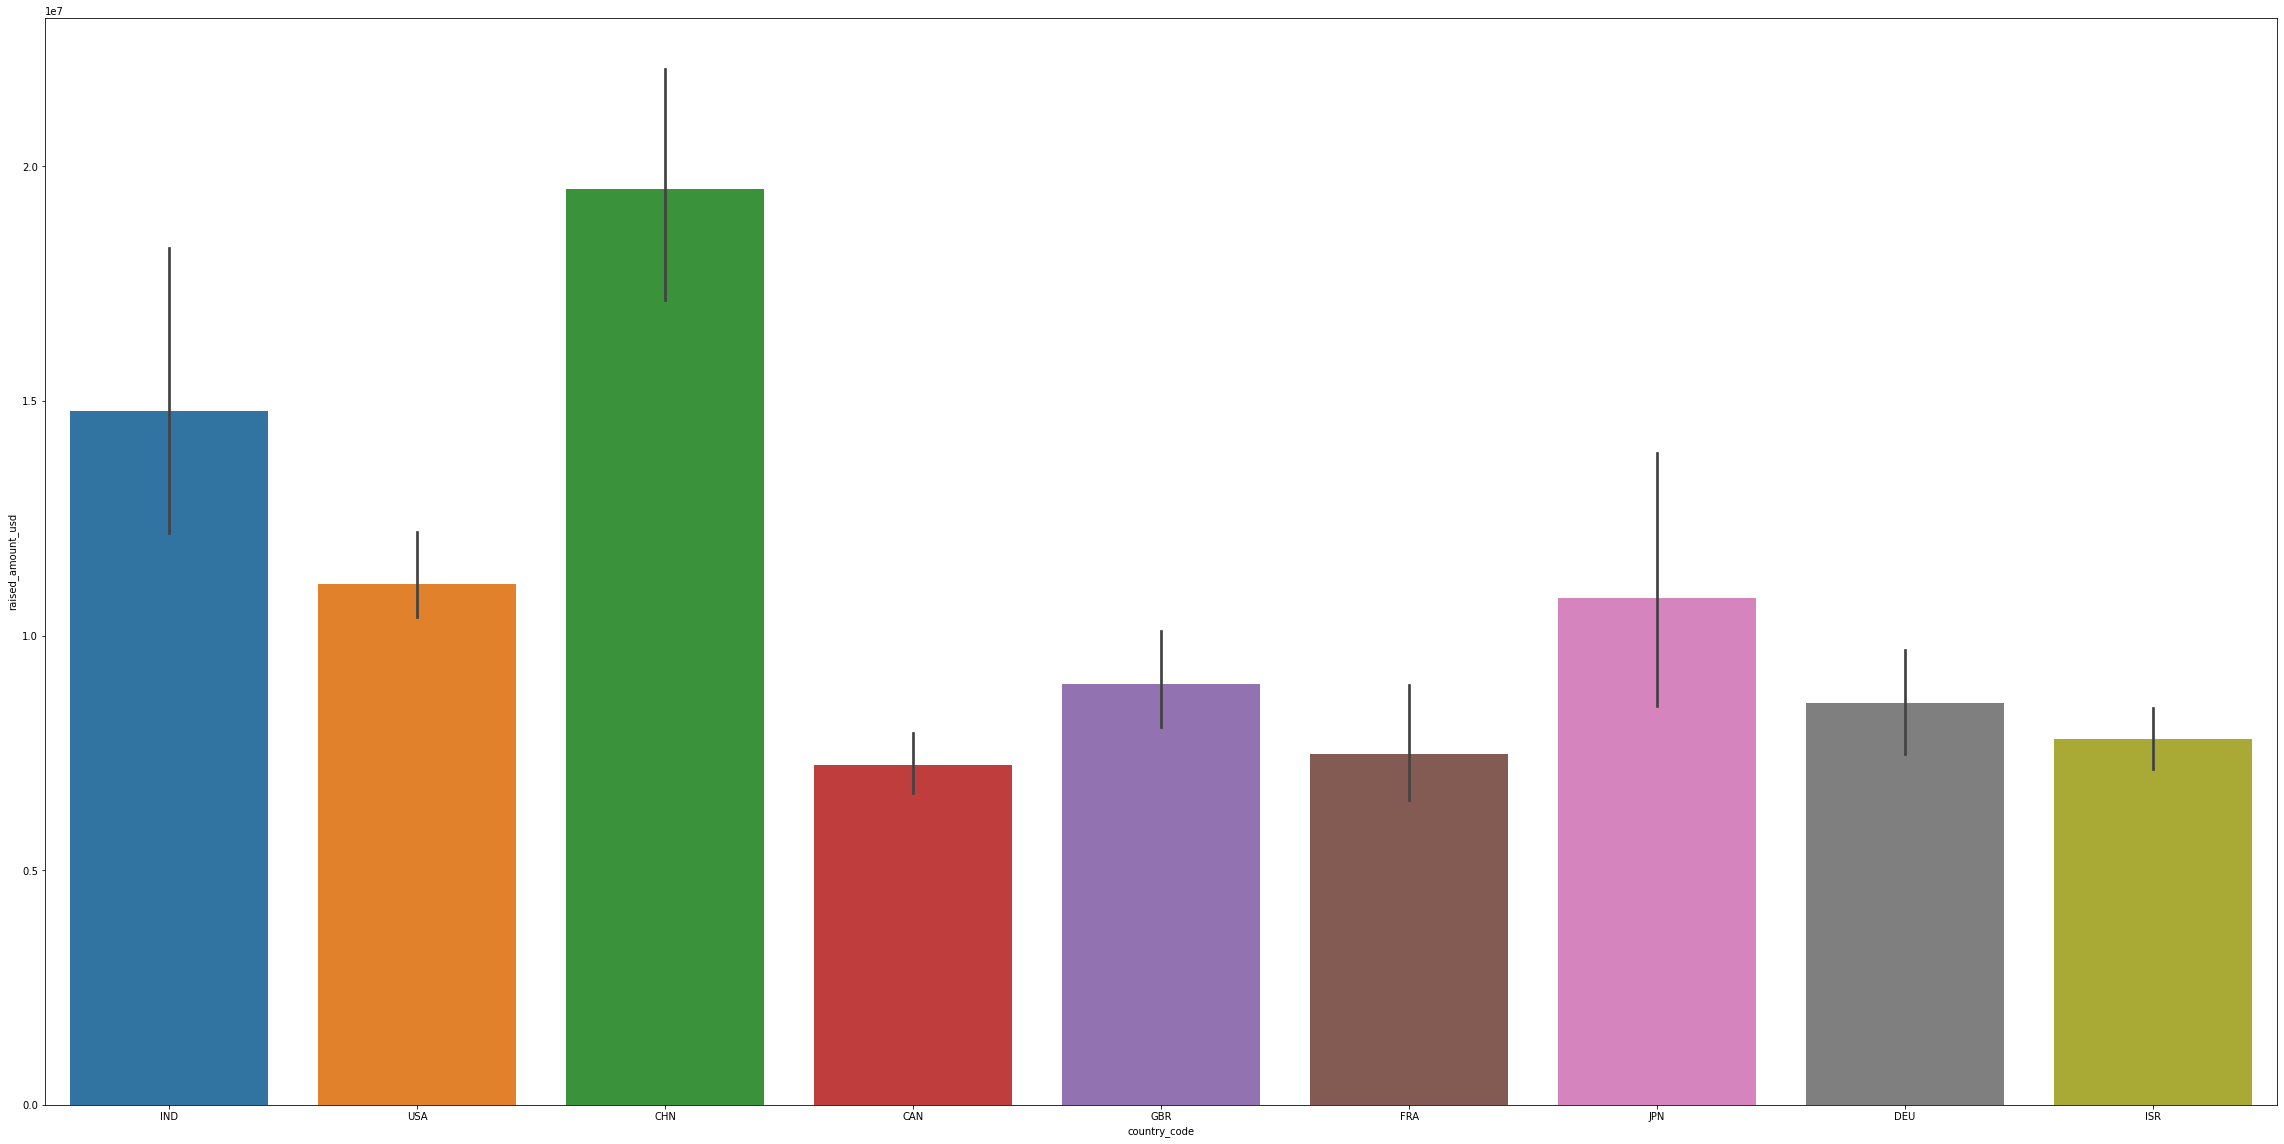

In [30]:
#English speacking countries GRD, BMU and IND.(Rus,china,kor and Japan do not qualify)
plt.figure(figsize=[40,20])
sns.barplot(data=top9, x="country_code", y="raised_amount_usd")
plt.show()

In [31]:
#Importing the mapping data
mapping=pd.read_csv("mapping.csv",encoding="ISO-8859–1")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [32]:
#Code for Creating new column for sector identification for each category

mapping_value_vars=list(mapping.columns[1:])
mapping_id_vars=list(mapping.columns[0:1])

print(mapping_value_vars,"\n")
print(mapping_id_vars)


['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising'] 

['category_list']


In [33]:
#converting to long format
mapping_long=pd.melt(mapping,id_vars=mapping_id_vars,value_vars=mapping_value_vars)

In [34]:
mapping_long=mapping_long[mapping_long['value']==1]
mapping_long=mapping_long.drop('value',axis=1)
mapping_long.head(10)

,category_list,variable
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
57,Bicycles,Automotive & Sports
69,Boating Industry,Automotive & Sports
87,CAD,Automotive & Sports
93,Cars,Automotive & Sports
188,Design,Automotive & Sports


In [35]:
top9.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,1680521.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,1680521.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0


In [36]:
top9['ModifiedCategory'] = top9['category_list'].str.split('|').str[0]
top9.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,ModifiedCategory
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,1680521.0,Application Platforms
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,Curated Web
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,1680521.0,Software
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Biotechnology


In [37]:
#merge the mapping column and the top 9 column based on category

#Lower case on merge column for both table
top9.ModifiedCategory=top9.ModifiedCategory.str.lower()
mapping_long.category_list=mapping_long.category_list.str.lower()

#merging both list
ventureTable=pd.merge(top9,mapping_long,how='inner', left_on='ModifiedCategory', right_on='category_list')

ventureTable.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,ModifiedCategory,category_list_y,variable
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,media,media,Entertainment
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,media,media,Entertainment
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,media,media,Entertainment
3,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,media,media,Entertainment
4,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,media,media,Entertainment


In [38]:
#drop category repeated columns
ventureTable=ventureTable.drop(['category_list_x'],axis=1)
ventureTable=ventureTable.drop(['category_list_y'],axis=1)
ventureTable.head()

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,ModifiedCategory,variable
0,/organization/-fame,#fame,http://livfame.com,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,media,Entertainment
1,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,media,Entertainment
2,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,media,Entertainment
3,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01-01-2011,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,media,Entertainment
4,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,operating,USA,CA,Los Angeles,Los Angeles,NaN,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,media,Entertainment


In [41]:
ventureTable=ventureTable[(ventureTable.raised_amount_usd>=5000000) & (ventureTable.raised_amount_usd<=15000000) ]
ventureTable.head()

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,ModifiedCategory,variable
0,/organization/-fame,#fame,http://livfame.com,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,media,Entertainment
1,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,media,Entertainment
2,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,media,Entertainment
4,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,operating,USA,CA,Los Angeles,Los Angeles,NaN,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,media,Entertainment
14,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,media,Entertainment


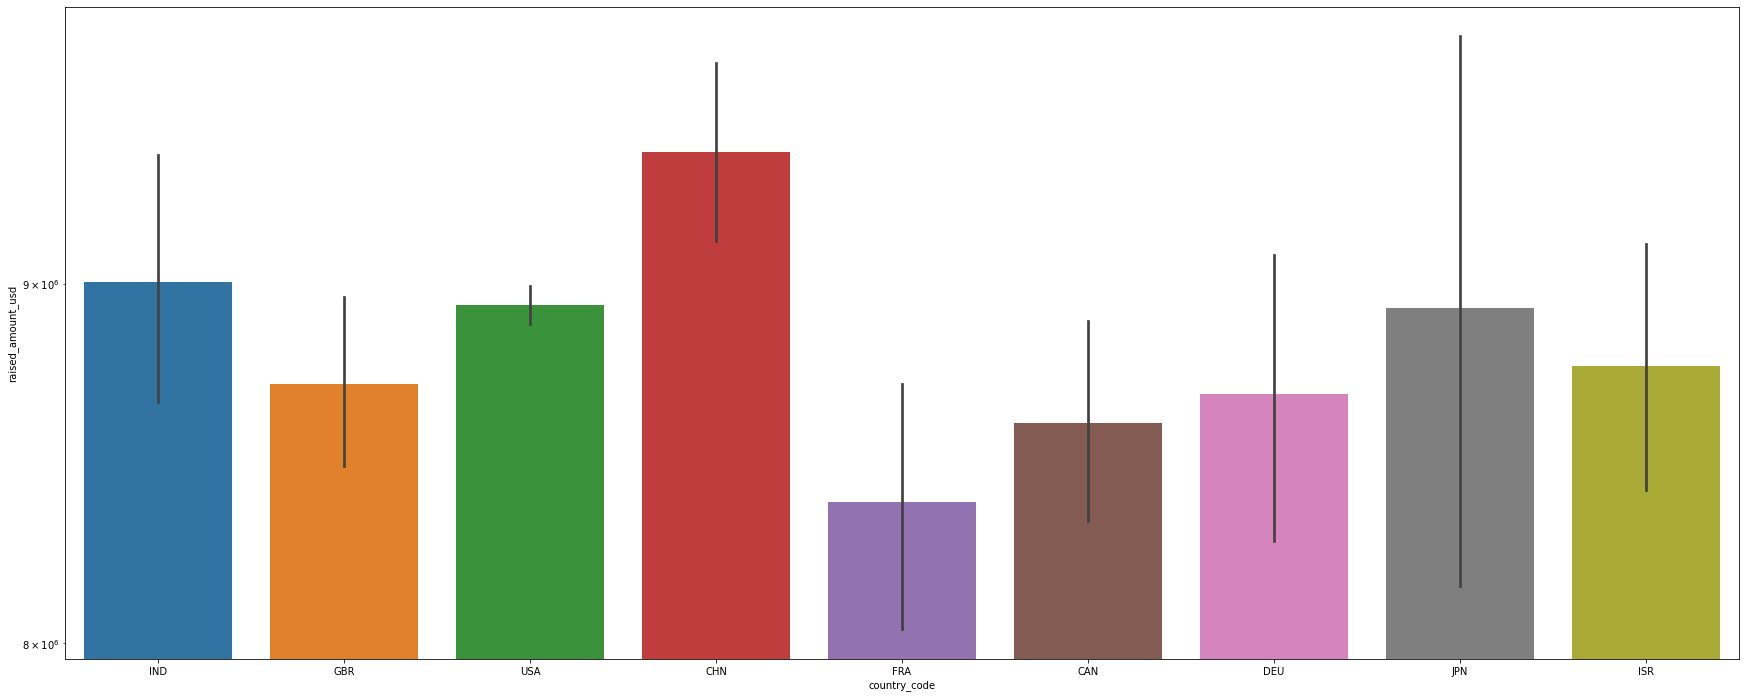

In [81]:
plt.figure(figsize=[30,12])
p=sns.barplot(data=ventureTable, x="country_code", y="raised_amount_usd")
p.set_yscale('log')
plt.show()

##Even after filtering it shows that India, USA and UK is best opputunity for investment in english speaking countries

#Sector Analysis

In [49]:
#USA
D1=ventureTable[ventureTable['country_code']=='USA']
D1.raised_amount_usd.sum()


100426287841.0

In [53]:
D1_by_sector=D1.groupby('variable')
D1_by_sector['raised_amount_usd'].count().sort_values(ascending = False).head()

variable
Others                                     2923
Cleantech / Semiconductors                 2297
Social, Finance, Analytics, Advertising    1912
News, Search and Messaging                 1563
Health                                      908
Name: raised_amount_usd, dtype: int64

In [55]:
D1.raised_amount_usd.count()

11235

In [91]:
D1[D1['variable']=='Others'].groupby('permalink').raised_amount_usd.count().sort_values(ascending=False).head(1)

permalink
/organization/black-duck-software    6
Name: raised_amount_usd, dtype: int64

In [92]:
D1[D1['variable']=='Cleantech / Semiconductors'].groupby('permalink').raised_amount_usd.count().sort_values(ascending=False).head(1)

permalink
/organization/tigo-energy    8
Name: raised_amount_usd, dtype: int64

## GBR

In [61]:
#GBR
D2=ventureTable[ventureTable['country_code']=='GBR']
D2.raised_amount_usd.sum()


5086469206.0

In [62]:
D2_by_sector=D2.groupby('variable')
D2_by_sector['raised_amount_usd'].count().sort_values(ascending = False).head()

variable
Others                                     143
Cleantech / Semiconductors                 127
Social, Finance, Analytics, Advertising     98
News, Search and Messaging                  73
Entertainment                               54
Name: raised_amount_usd, dtype: int64

In [63]:
D2.raised_amount_usd.count()

584

In [89]:
D2[D2['variable']=='Others'].groupby('permalink').raised_amount_usd.count().sort_values(ascending=False).head(1)

permalink
/organization/sensage    4
Name: raised_amount_usd, dtype: int64

In [90]:
D2[D2['variable']=='Cleantech / Semiconductors'].groupby('permalink').raised_amount_usd.count().sort_values(ascending=False).head(1)

permalink
/organization/eusa-pharma    3
Name: raised_amount_usd, dtype: int64

## IND

In [82]:
#IND
D3=ventureTable[ventureTable['country_code']=='IND']
D3.raised_amount_usd.sum()


2710537552.0

In [83]:
D3_by_sector=D3.groupby('variable')
D3_by_sector['raised_amount_usd'].count().sort_values(ascending = False).head()

variable
Others                                     109
News, Search and Messaging                  52
Entertainment                               33
Social, Finance, Analytics, Advertising     32
Manufacturing                               21
Name: raised_amount_usd, dtype: int64

In [84]:
D3.raised_amount_usd.count()

301

In [87]:
D3[D3['variable']=='Others'].groupby('permalink').raised_amount_usd.count().sort_values(ascending=False).head(1)

permalink
/organization/myntra    4
Name: raised_amount_usd, dtype: int64

In [88]:
D3[D3['variable']=='Cleantech / Semiconductors'].groupby('permalink').raised_amount_usd.count().sort_values(ascending=False).head(1)

permalink
/organization/azure-power    4
Name: raised_amount_usd, dtype: int64

#Graphs For PPt

##A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

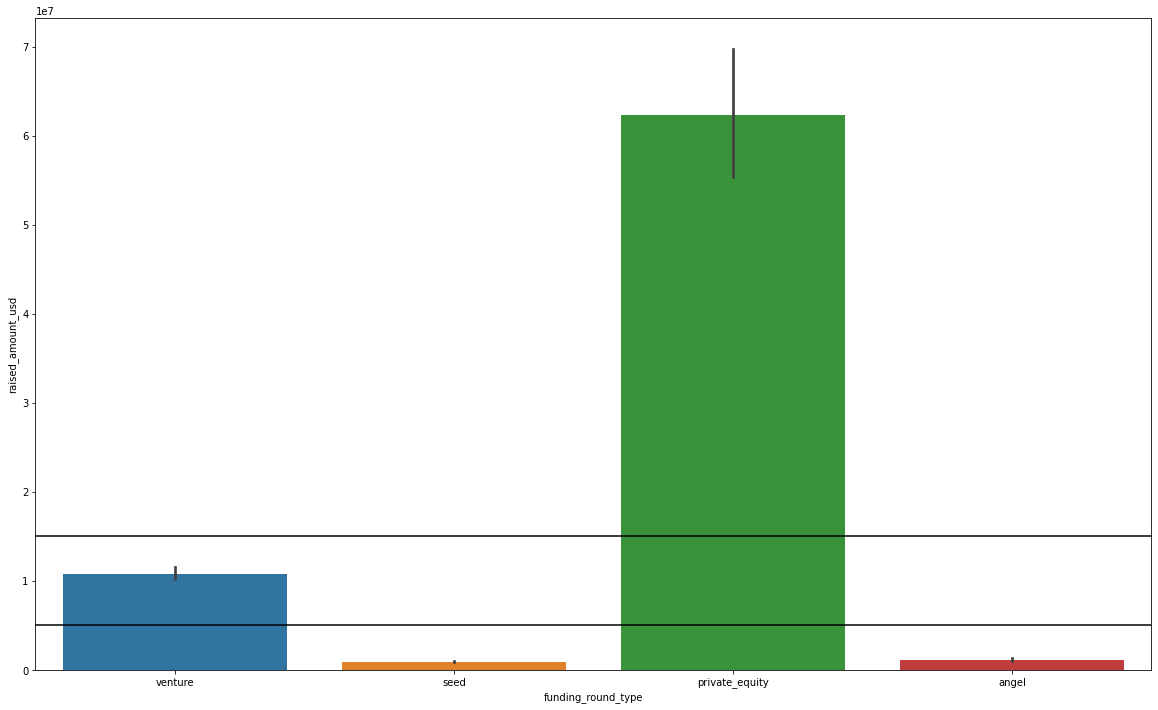

In [78]:
#?sns.barplot
plt.figure(figsize=(20,12))
g=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.axhline(5000000, color='black')
plt.axhline(15000000, color='black')
plt.show()

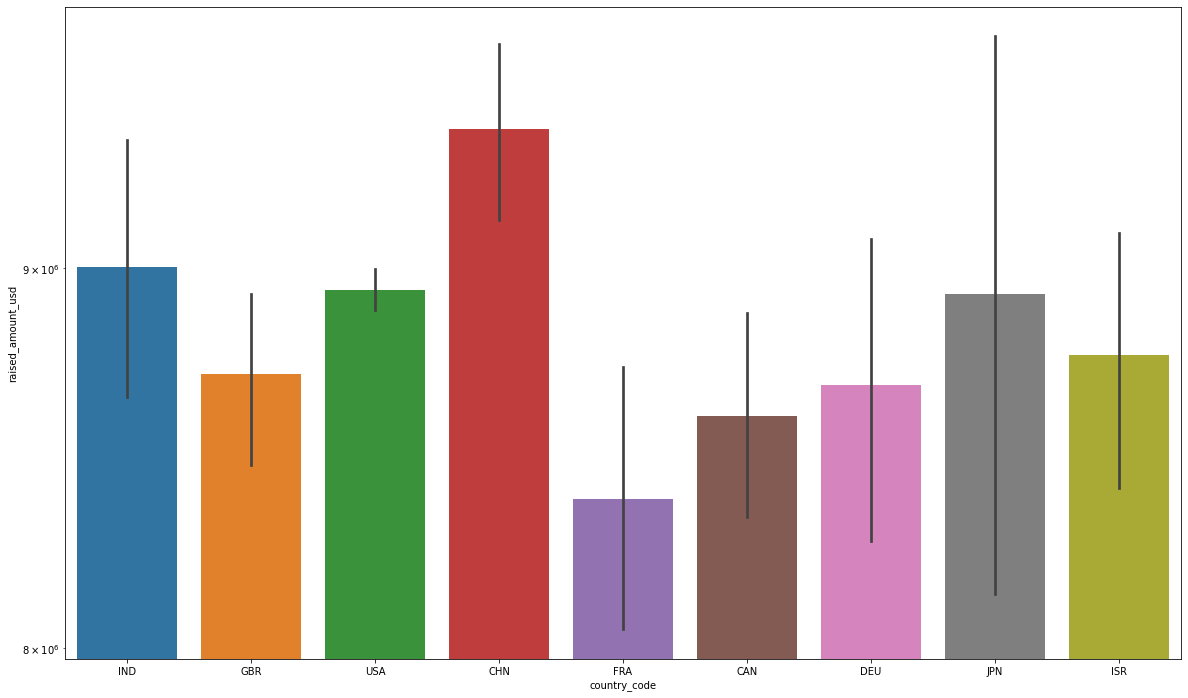

In [94]:
#A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

plt.figure(figsize=(20,12))
p=sns.barplot(x='country_code', y='raised_amount_usd', data=ventureTable)
p.set_yscale('log')
plt.show()

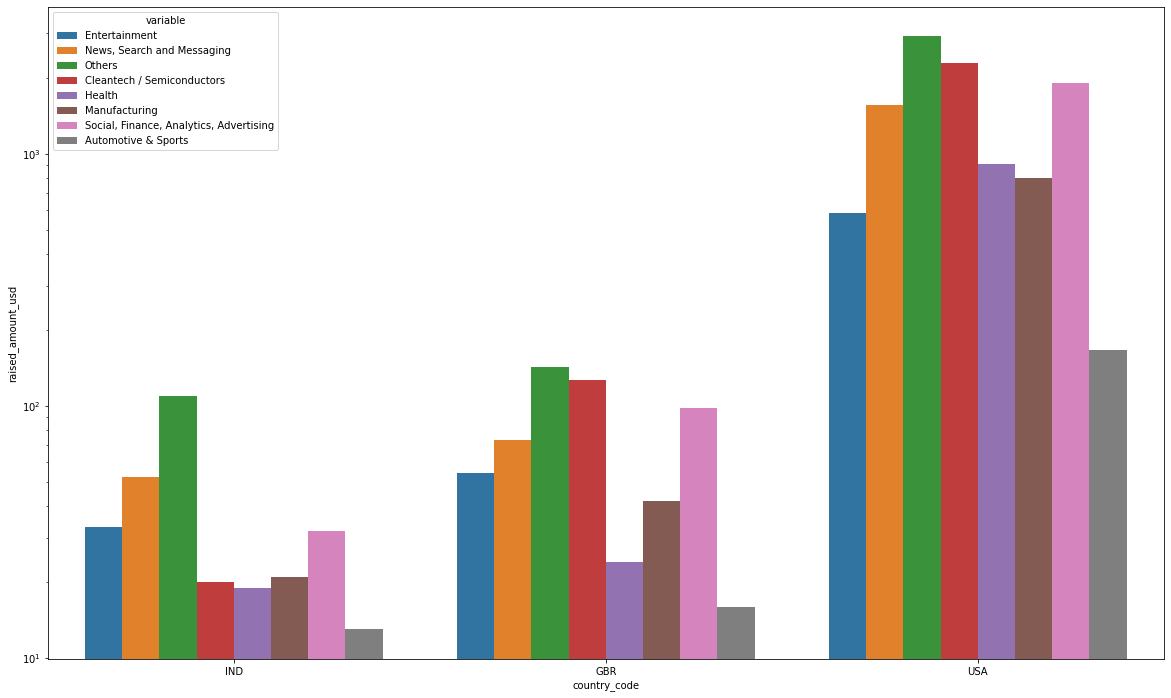

In [109]:
#A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.
plt.figure(figsize=(20,12))
df_final=ventureTable[ventureTable.country_code.isin(['IND','USA','GBR'])]
df_final=df_final[df_final.variable!='Blanks']
p=sns.barplot(x='country_code', y='raised_amount_usd', hue="variable", data=df_final, estimator=lambda x:len(x))
p.set_yscale('log')
plt.show()